In [63]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np

from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from  sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from  sklearn.metrics import *
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn import model_selection
import plotly.express as px
import rfpimp
import pickle

In [64]:
df = pd.read_csv("../data/clean/clean_encoded.csv")

In [65]:
df.head()

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,1,231,0,11,93.994,364,4.857,51910,0,...,1,0,0,0,1,0,0,0,1,0
1,57,1,231,0,11,93.994,364,4.857,51910,0,...,1,0,0,0,1,0,0,0,1,0
2,37,1,231,0,11,93.994,364,4.857,51910,0,...,1,0,0,0,1,0,0,0,1,0
3,40,1,231,0,11,93.994,364,4.857,51910,0,...,1,0,0,0,1,0,0,0,1,0
4,56,1,231,0,11,93.994,364,4.857,51910,0,...,1,0,0,0,1,0,0,0,1,0


In [66]:
X = df.drop("y", axis=1)
y = df.y

No I try out some different classifiers and choose the one which fits best for this job.

In [67]:
rfc = RandomForestClassifier()
score = cross_validate(rfc, X, y, cv=10, scoring=('accuracy', 'average_precision', 'recall','f1',"roc_auc", "neg_log_loss"), n_jobs=-1)

In [68]:
score

{'fit_time': array([4.89524984, 5.02555609, 4.88584185, 5.37305999, 5.27210617,
        5.31625295, 5.32953906, 5.11952281, 3.14188218, 3.14135718]),
 'score_time': array([0.14541912, 0.2462039 , 0.19790101, 0.194175  , 0.20320606,
        0.18063807, 0.16166306, 0.16107321, 0.12074876, 0.07833314]),
 'test_accuracy': array([0.88732394, 0.87348227, 0.12846042, 0.81520155, 0.67508499,
        0.38829529, 0.2744717 , 0.07529755, 0.19213019, 0.18702939]),
 'test_average_precision': array([0.17367958, 0.09254632, 0.08605813, 0.07305089, 0.07676344,
        0.07186354, 0.06582521, 0.06309428, 0.06168919, 0.08947341]),
 'test_recall': array([0.        , 0.        , 0.00215517, 0.01508621, 0.01724138,
        0.        , 0.00215983, 0.00431034, 0.00862069, 1.        ]),
 'test_f1': array([0.        , 0.        , 0.00055695, 0.01806452, 0.01181684,
        0.        , 0.00066912, 0.00104959, 0.00239952, 0.21707602]),
 'test_roc_auc': array([0.53928235, 0.05135108, 0.00647053, 0.09400804, 0.069

In [69]:
score["test_accuracy"].mean()

0.4496777301804681

In [70]:
bgc = BaggingClassifier()
score = cross_validate(bgc, X, y, cv=10, scoring=('accuracy', 'average_precision', 'recall','f1',"roc_auc", "neg_log_loss"), n_jobs=-1)

In [71]:
score

{'fit_time': array([2.09021115, 2.17717791, 2.04472923, 2.08550119, 2.27628589,
        2.35272026, 2.13977313, 2.23087502, 1.46954584, 1.47841883]),
 'score_time': array([0.04685783, 0.05258799, 0.05051994, 0.05451989, 0.04328609,
        0.02970481, 0.05576086, 0.03734708, 0.03455019, 0.03504109]),
 'test_accuracy': array([0.88732394, 0.6811559 , 0.06435163, 0.48980087, 0.48227295,
        0.08572122, 0.29778965, 0.07213991, 0.12387661, 0.16614039]),
 'test_average_precision': array([0.13753643, 0.10875682, 0.10287027, 0.09840345, 0.10168925,
        0.09580056, 0.10407798, 0.10175618, 0.07684802, 0.12249208]),
 'test_recall': array([0.        , 0.        , 0.00215517, 0.01939655, 0.02155172,
        0.00431034, 0.01079914, 0.00431034, 0.03663793, 1.        ]),
 'test_f1': array([0.        , 0.        , 0.00051881, 0.00849457, 0.00929368,
        0.00106129, 0.00344709, 0.00104603, 0.00933809, 0.21279523]),
 'test_roc_auc': array([0.51400862, 0.15741488, 0.0123486 , 0.09366536, 0.099

In [72]:
score["test_accuracy"].mean()

0.33505730807583856

In [73]:
dtc = DecisionTreeClassifier()
score = cross_validate(dtc, X, y, cv=10, scoring=('accuracy', 'average_precision', 'recall','f1',"roc_auc", "neg_log_loss"), n_jobs=-1)

In [74]:
score

{'fit_time': array([0.38405919, 0.37010717, 0.35893297, 0.37868214, 0.40630341,
        0.42722416, 0.38691497, 0.38420391, 0.24306369, 0.2456398 ]),
 'score_time': array([0.02380395, 0.03675199, 0.02646828, 0.0225842 , 0.02157974,
        0.01643586, 0.01881123, 0.01297212, 0.01330709, 0.01283121]),
 'test_accuracy': array([0.88780962, 0.45264692, 0.06095192, 0.26566294, 0.32758621,
        0.08499271, 0.26135536, 0.06655332, 0.10687394, 0.15083799]),
 'test_average_precision': array([0.11650073, 0.11243442, 0.11195324, 0.10813534, 0.10879954,
        0.11008326, 0.11126692, 0.11126893, 0.10384421, 0.11717172]),
 'test_recall': array([0.00431034, 0.00215517, 0.00646552, 0.04094828, 0.03448276,
        0.0237069 , 0.01079914, 0.01293103, 0.08836207, 1.        ]),
 'test_f1': array([0.00858369, 0.00088652, 0.00154919, 0.01241019, 0.01142449,
        0.00580475, 0.00327761, 0.00311284, 0.02181431, 0.20976492]),
 'test_roc_auc': array([0.50215517, 0.25559407, 0.03716817, 0.16696954, 0.199

In [75]:
score["test_accuracy"].mean()

0.2665270913209695

In [76]:
knc = KNeighborsClassifier()
score = cross_validate(knc, X, y, cv=10, scoring=('accuracy', 'average_precision', 'recall','f1',"roc_auc", "neg_log_loss"), n_jobs=-1)

In [77]:
score

{'fit_time': array([1.16420197, 1.16567707, 0.99911499, 0.95678067, 1.00472617,
        0.93972111, 1.1655581 , 1.175318  , 0.97046494, 0.83623719]),
 'score_time': array([1.99411201, 1.991436  , 1.45885992, 2.00445628, 2.0463469 ,
        0.92940211, 1.27710199, 1.85570908, 1.06595993, 0.59110379]),
 'test_accuracy': array([0.88732394, 0.88659543, 0.80767363, 0.8596406 , 0.86449733,
        0.77853327, 0.78090843, 0.36361428, 0.71265485, 0.31430653]),
 'test_average_precision': array([0.12606241, 0.10865548, 0.10396372, 0.09873199, 0.09959279,
        0.09945183, 0.09402412, 0.08343308, 0.09726597, 0.14409938]),
 'test_recall': array([0.        , 0.        , 0.01077586, 0.00646552, 0.00862069,
        0.01724138, 0.06263499, 0.14655172, 0.13362069, 1.        ]),
 'test_f1': array([0.        , 0.        , 0.01246883, 0.01027397, 0.01413428,
        0.01724138, 0.06041667, 0.04934688, 0.09487376, 0.24740069]),
 'test_roc_auc': array([0.5075431 , 0.38259678, 0.21257202, 0.34627646, 0.325

In [78]:
score["test_accuracy"].mean()

0.7255748296282263

KNeighboraClassifier seems to deliver the best results in terms of accuracy. So I try to optimize this classifier a bit.

In [79]:
k_range = range(100, 2000, 100)
k_scores = []
for k in k_range:
    knc = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knc, X, y, cv=10, scoring="accuracy", n_jobs=-1)
    k_scores.append(score.mean())
print(k_scores)

[0.7852969120915978, 0.7897176598576154, 0.8023725056190922, 0.8093193115457378, 0.8277550657356819, 0.8338274485386938, 0.8323700766659711, 0.8325158138532434, 0.8307912571371879, 0.8312284686990049, 0.8313742058862772, 0.8416486775889732, 0.8426202588374551, 0.8552751045989317, 0.8559066324104452, 0.8576797681889247, 0.8576797681889247, 0.8576797681889247, 0.8576797681889247]


Text(0, 0.5, 'Cross-Validated Accuracy')

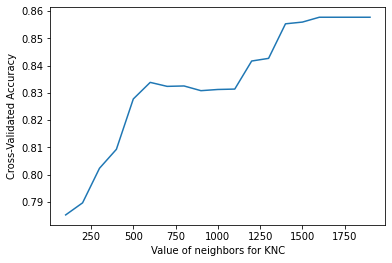

In [87]:
%matplotlib inline

plt.plot(k_range, k_scores)
plt.xlabel("Value of neighbors for KNC")
plt.ylabel("Cross-Validated Accuracy")

As seen in the plot. A KNC with 1500 neighbors would be a good choice. Higher numbers of neighbors won't lead to much improvement anymore.

Now I train the best classifier with the right parameters.

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
knc = KNeighborsClassifier(n_neighbors=1500)
knc.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1500, p=2,
                     weights='uniform')

Predict the values for the test datasest.

In [83]:
y_pred = knc.predict(X_test)

In [84]:
accuracy_score(y_test, y_pred)

0.8908450704225352

Plot feature importance.

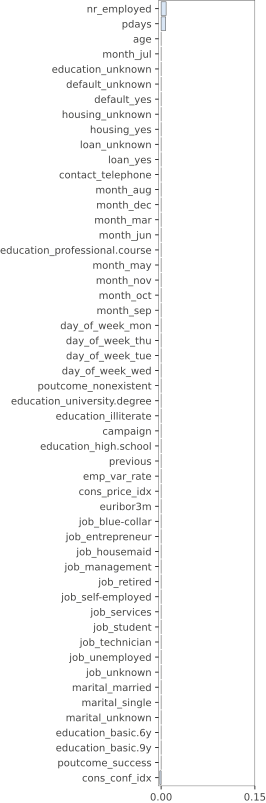

In [85]:
importance = rfpimp.importances(knc, X_train, y_train)
rfpimp.plot_importances(importance)

And finally I save the model for later use.

In [86]:
pickle.dump(knc, open('../models/KNeighborsClassifier.model', 'wb'))

Instruction on how to use a saved model.

In [11]:
loaded_rfc = pickle.load(open('../models/RandomForestClassifier.model', 'rb'))

In [ ]:
sample = ["..."]

In [ ]:
loaded_rfc.predict([sample])